# CSV generator for RPU sample data
**I used this notebook to find, calculate and generate CSV file for RPU sample data**
> This was a useful for testing the RPU calculator that I [developed](https://github.com/maquedano/shiny_app_AB_Rpu_calc) and that
is deployed on https://maquedano.shinyapps.io/rpu-ab-test-calc/

---

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import mannwhitneyu
import scipy.stats as scs
import matplotlib.ticker as mtick
import seaborn as sns
import math
from matplotlib.ticker import AutoMinorLocator, FormatStrFormatter

* (A) Run this cell below to generate some gamma random data distribution based on mean and standard deviation.
So far this is the best method that I found resembles a RPU dist. But all of this I have done it quick and dirty, so might be something more fitting in the future.

In [8]:
def calculate_gamma_params(mean, std_dev):
    # Calculate shape (k) and scale (theta) parameters
    k = (mean / std_dev) ** 2
    theta = (std_dev ** 2) / mean
    
    return k, theta

mean = 3.87
mean_2 = 4.06
std_dev = 28.53
shape, scale = calculate_gamma_params(mean, std_dev)
shape2, scale2 = calculate_gamma_params(mean_2, std_dev)
rng = np.random.default_rng()
data_a = rng.gamma(shape, scale, size=9767)
data_b = rng.gamma(shape2, scale2, size=9767)

* (B) Run this cell below to generate some normal random data distribution 

In [ ]:
mean = 3.87
mean_2 = 4.56
std_dev = 28.53

rng = np.random.default_rng(300)
data_a = rng.normal(mean, std_dev, size=9767)
data_b = rng.normal(mean, std_dev, size=9767)

* (C) Run this cell below to generate some lognormal distribution

In [ ]:
rng = np.random.default_rng(300)
data_a = rng.lognormal(math.log(3.87), sigma=1.4, size=9767)
data_b = rng.lognormal(math.log(4.01), sigma=1.4, size=9767)

* Then I round and remove the decimals (just a choice, prices could have decimals)
* Then I eliminate the negative values and replace them with zeroes, as the RPU data usually have a looot of zeroes. 
* Quickly plort the distributions and check the mean and standard deviation

5.060612265792976
38.85482152161385
4.049554622709122
25.878028667660054


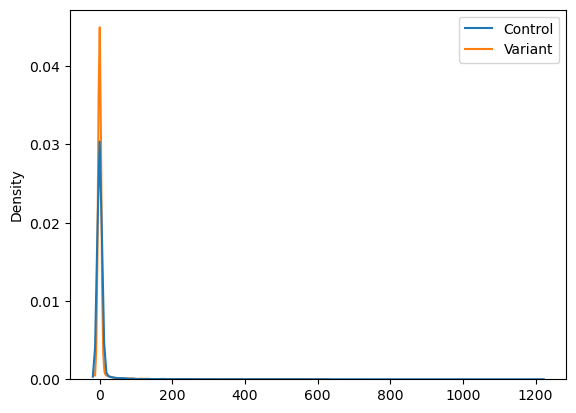

In [9]:
data_a = data_a.round(0)
data_a[data_a <1] = 0
data_b = data_b.round(0)
data_b[data_b <1] = 0

# Create a sample DataFrame
data = {'Control': data_a,
        'Variant': data_b}

#arr[:] = np.nan
df = pd.DataFrame(data, columns=['Control', 'Variant'])
sns.kdeplot(df)
print(data_a.mean())
print(data_a.std())
print(data_b.mean())
print(data_b.std())

* I convert the dataframe to string and remove all the annoying the decimal separators ( .0)
* Finally I create the CSV file and export the dataframe

In [11]:
df = df.astype(str)
df = df.replace(to_replace = "\.0", value = "", regex = True)
df.iloc[-41:,1] = ""

df.to_csv('output/SampleRevenueData.csv', sep=',', index=False, encoding='utf-8')